In [32]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"] = "" 

In [33]:
data = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')
raw_X=data['cond']
raw_Y=data['fac'][:,2]
raw_Y=raw_Y.astype(np.float64)
NUM_TIMESTEPS = 65
HIDDEN_SIZE = 10
BATCH_SIZE = 128   
NUM_EPOCHS = 1000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]


In [34]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(2000, 65, 1) (1000, 65, 1) (2000,) (1000,)


In [35]:
model = Sequential()
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=False,activation='relu'))
model.add(BatchNormalization())
# model.add(Activation('tanh'))
model.add(Dense(1))
model.summary()

model.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mean_absolute_error"])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 65, 10)            480       
_________________________________________________________________
batch_normalization_10 (Batc (None, 65, 10)            40        
_________________________________________________________________
lstm_12 (LSTM)               (None, 65, 10)            840       
_________________________________________________________________
batch_normalization_11 (Batc (None, 65, 10)            40        
_________________________________________________________________
lstm_13 (LSTM)               (None, 65, 10)            840       
_________________________________________________________________
batch_normalization_12 (Batc (None, 65, 10)            40        
_________________________________________________________________
lstm_14 (LSTM)               (None, 65, 10)           

In [36]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
model.save('lstm_bn_5000_2.h5')
 

Epoch 1/1000
16/16 [==============================] - 9s 154ms/step - loss: 0.4419 - mean_absolute_error: 0.4419 - val_loss: 0.0675 - val_mean_absolute_error: 0.0675
Epoch 2/1000
16/16 [==============================] - 2s 120ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - val_loss: 0.0231 - val_mean_absolute_error: 0.0231
Epoch 3/1000
16/16 [==============================] - 2s 120ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132
Epoch 4/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - val_loss: 0.0224 - val_mean_absolute_error: 0.0224
Epoch 5/1000
16/16 [==============================] - 2s 120ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - val_loss: 0.0744 - val_mean_absolute_error: 0.0744
Epoch 6/1000
16/16 [==============================] - 2s 121ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - val_loss: 0.1403 - val_mean_absolute_error: 0.1403
Epoc

16/16 [==============================] - 2s 120ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - val_loss: 0.0267 - val_mean_absolute_error: 0.0267
Epoch 51/1000
16/16 [==============================] - 2s 119ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - val_loss: 0.0278 - val_mean_absolute_error: 0.0278
Epoch 52/1000
16/16 [==============================] - 2s 119ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - val_loss: 0.0297 - val_mean_absolute_error: 0.0297
Epoch 53/1000
16/16 [==============================] - 2s 120ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - val_loss: 0.0362 - val_mean_absolute_error: 0.0362
Epoch 54/1000
16/16 [==============================] - 2s 120ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - val_loss: 0.0317 - val_mean_absolute_error: 0.0317
Epoch 55/1000
16/16 [==============================] - 2s 120ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - val_loss: 0.0337 - val_mean_absolute_error: 0.0337
Epoch 56/100

16/16 [==============================] - 2s 121ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - val_loss: 0.0256 - val_mean_absolute_error: 0.0256
Epoch 100/1000
16/16 [==============================] - 2s 123ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - val_loss: 0.0180 - val_mean_absolute_error: 0.0180
Epoch 101/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - val_loss: 0.0212 - val_mean_absolute_error: 0.0212
Epoch 102/1000
16/16 [==============================] - 2s 119ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - val_loss: 0.0231 - val_mean_absolute_error: 0.0231
Epoch 103/1000
16/16 [==============================] - 2s 122ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281
Epoch 104/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119
Epoch 1

Epoch 148/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - val_loss: 0.3042 - val_mean_absolute_error: 0.3042
Epoch 149/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - val_loss: 0.3031 - val_mean_absolute_error: 0.3031
Epoch 150/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - val_loss: 0.3115 - val_mean_absolute_error: 0.3115
Epoch 151/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - val_loss: 0.3018 - val_mean_absolute_error: 0.3018
Epoch 152/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - val_loss: 0.3025 - val_mean_absolute_error: 0.3025
Epoch 153/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - val_loss: 0.3053 - val_mean_absolute_error:

Epoch 197/1000
16/16 [==============================] - 2s 121ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - val_loss: 0.2383 - val_mean_absolute_error: 0.2383
Epoch 198/1000
16/16 [==============================] - 2s 122ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - val_loss: 0.2543 - val_mean_absolute_error: 0.2543
Epoch 199/1000
16/16 [==============================] - 2s 119ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - val_loss: 0.2290 - val_mean_absolute_error: 0.2290
Epoch 200/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - val_loss: 0.2249 - val_mean_absolute_error: 0.2249
Epoch 201/1000
16/16 [==============================] - 2s 119ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - val_loss: 0.2269 - val_mean_absolute_error: 0.2269
Epoch 202/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - val_loss: 0.2159 - val_mean_absolute_error:

Epoch 246/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089
Epoch 247/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - val_loss: 0.0222 - val_mean_absolute_error: 0.0222
Epoch 248/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135
Epoch 249/1000
16/16 [==============================] - 2s 119ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - val_loss: 0.0157 - val_mean_absolute_error: 0.0157
Epoch 250/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - val_loss: 0.0130 - val_mean_absolute_error: 0.0130
Epoch 251/1000
16/16 [==============================] - 2s 119ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - val_loss: 0.0135 - val_mean_absolute_error:

Epoch 295/1000
16/16 [==============================] - 2s 119ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093
Epoch 296/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - val_loss: 0.0114 - val_mean_absolute_error: 0.0114
Epoch 297/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - val_loss: 0.0251 - val_mean_absolute_error: 0.0251
Epoch 298/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123
Epoch 299/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129
Epoch 300/1000
16/16 [==============================] - 2s 119ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - val_loss: 0.0108 - val_mean_absolute_error:

Epoch 344/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121
Epoch 345/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - val_loss: 0.0114 - val_mean_absolute_error: 0.0114
Epoch 346/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084
Epoch 347/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122
Epoch 348/1000
16/16 [==============================] - 2s 122ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - val_loss: 0.0148 - val_mean_absolute_error: 0.0148
Epoch 349/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - val_loss: 0.0101 - val_mean_absolute_error:

Epoch 393/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - val_loss: 0.0602 - val_mean_absolute_error: 0.0602
Epoch 394/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - val_loss: 0.0672 - val_mean_absolute_error: 0.0672
Epoch 395/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - val_loss: 0.0789 - val_mean_absolute_error: 0.0789
Epoch 396/1000
16/16 [==============================] - 2s 120ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - val_loss: 0.0900 - val_mean_absolute_error: 0.0900
Epoch 397/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - val_loss: 0.0435 - val_mean_absolute_error: 0.0435
Epoch 398/1000
16/16 [==============================] - 2s 119ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - val_loss: 0.0194 - val_mean_absolute_error:

Epoch 442/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066
Epoch 443/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214
Epoch 444/1000
16/16 [==============================] - 2s 119ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - val_loss: 0.0233 - val_mean_absolute_error: 0.0233
Epoch 445/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134
Epoch 446/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095
Epoch 447/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - val_loss: 0.0131 - val_mean_absolute_error:

Epoch 491/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069
Epoch 492/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0156 - val_mean_absolute_error: 0.0156
Epoch 493/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - val_loss: 0.0140 - val_mean_absolute_error: 0.0140
Epoch 494/1000
16/16 [==============================] - 2s 119ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - val_loss: 0.0171 - val_mean_absolute_error: 0.0171
Epoch 495/1000
16/16 [==============================] - 2s 120ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - val_loss: 0.0081 - val_mean_absolute_error: 0.0081
Epoch 496/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - val_loss: 0.0073 - val_mean_absolute_error:

Epoch 540/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - val_loss: 0.0423 - val_mean_absolute_error: 0.0423
Epoch 541/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0054 - val_mean_absolute_error: 0.0054
Epoch 542/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0136 - val_mean_absolute_error: 0.0136
Epoch 543/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123
Epoch 544/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - val_loss: 0.0153 - val_mean_absolute_error: 0.0153
Epoch 545/1000
16/16 [==============================] - 2s 123ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0154 - val_mean_absolute_error:

Epoch 589/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0530 - val_mean_absolute_error: 0.0530
Epoch 590/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0221 - val_mean_absolute_error: 0.0221
Epoch 591/1000
16/16 [==============================] - 2s 114ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0164 - val_mean_absolute_error: 0.0164
Epoch 592/1000
16/16 [==============================] - 2s 114ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.0044 - val_mean_absolute_error: 0.0044
Epoch 593/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088
Epoch 594/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0100 - val_mean_absolute_error:

Epoch 638/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - val_loss: 0.0175 - val_mean_absolute_error: 0.0175
Epoch 639/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - val_loss: 0.0181 - val_mean_absolute_error: 0.0181
Epoch 640/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.0053 - val_mean_absolute_error: 0.0053
Epoch 641/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088
Epoch 642/1000
16/16 [==============================] - 2s 119ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126
Epoch 643/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0074 - val_mean_absolute_error:

Epoch 687/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0327 - val_mean_absolute_error: 0.0327
Epoch 688/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258
Epoch 689/1000
16/16 [==============================] - 2s 114ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282
Epoch 690/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0046 - val_mean_absolute_error: 0.0046
Epoch 691/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125
Epoch 692/1000
16/16 [==============================] - 2s 114ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.0084 - val_mean_absolute_error:

Epoch 736/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - val_loss: 0.0031 - val_mean_absolute_error: 0.0031
Epoch 737/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - val_loss: 0.0154 - val_mean_absolute_error: 0.0154
Epoch 738/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.0244 - val_mean_absolute_error: 0.0244
Epoch 739/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0159 - val_mean_absolute_error: 0.0159
Epoch 740/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - val_loss: 0.0264 - val_mean_absolute_error: 0.0264
Epoch 741/1000
16/16 [==============================] - 2s 113ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0180 - val_mean_absolute_error:

Epoch 785/1000
16/16 [==============================] - 2s 118ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132
Epoch 786/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0178 - val_mean_absolute_error: 0.0178
Epoch 787/1000
16/16 [==============================] - 2s 114ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0167 - val_mean_absolute_error: 0.0167
Epoch 788/1000
16/16 [==============================] - 2s 114ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058
Epoch 789/1000
16/16 [==============================] - 2s 114ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0143 - val_mean_absolute_error: 0.0143
Epoch 790/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - val_loss: 0.0144 - val_mean_absolute_error:

Epoch 834/1000
16/16 [==============================] - 2s 121ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - val_loss: 0.0161 - val_mean_absolute_error: 0.0161
Epoch 835/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0190 - val_mean_absolute_error: 0.0190
Epoch 836/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0081 - val_mean_absolute_error: 0.0081
Epoch 837/1000
16/16 [==============================] - 2s 120ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0249 - val_mean_absolute_error: 0.0249
Epoch 838/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0176 - val_mean_absolute_error: 0.0176
Epoch 839/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0119 - val_mean_absolute_error:

Epoch 883/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.0165 - val_mean_absolute_error: 0.0165
Epoch 884/1000
16/16 [==============================] - 2s 113ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - val_loss: 0.0210 - val_mean_absolute_error: 0.0210
Epoch 885/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.0204 - val_mean_absolute_error: 0.0204
Epoch 886/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096
Epoch 887/1000
16/16 [==============================] - 2s 114ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.0112 - val_mean_absolute_error: 0.0112
Epoch 888/1000
16/16 [==============================] - 2s 120ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.0095 - val_mean_absolute_error:

Epoch 932/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064
Epoch 933/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - val_loss: 0.0165 - val_mean_absolute_error: 0.0165
Epoch 934/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0083 - val_mean_absolute_error: 0.0083
Epoch 935/1000
16/16 [==============================] - 2s 121ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0152 - val_mean_absolute_error: 0.0152
Epoch 936/1000
16/16 [==============================] - 2s 114ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0038 - val_mean_absolute_error: 0.0038
Epoch 937/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0023 - val_mean_absolute_error:

Epoch 981/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107
Epoch 982/1000
16/16 [==============================] - 2s 114ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - val_loss: 0.0081 - val_mean_absolute_error: 0.0081
Epoch 983/1000
16/16 [==============================] - 2s 114ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - val_loss: 0.0146 - val_mean_absolute_error: 0.0146
Epoch 984/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.0047 - val_mean_absolute_error: 0.0047
Epoch 985/1000
16/16 [==============================] - 2s 115ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057
Epoch 986/1000
16/16 [==============================] - 2s 116ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0204 - val_mean_absolute_error:

In [38]:
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
print(history.history.keys())
mean_absolute_error = history.history['mean_absolute_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']


MSE: 0.070, RMSE: 0.264
dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


In [40]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_absolute_error)),mean_absolute_error,label='train')
ax.plot(range(len(val_mean_absolute_error)),val_mean_absolute_error,label='val')

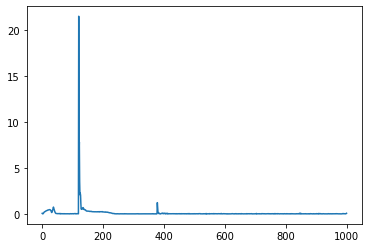

In [41]:
ax = plt.figure().add_subplot()
ax.plot(range(len(val_mean_absolute_error)),val_mean_absolute_error,label='val')

In [42]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre)

[[-1.39076978e-01]
 [-2.83863628e-03]
 [-8.87221321e-02]
 [ 9.54619609e-03]
 [-9.38421115e-02]
 [ 7.56130135e-03]
 [-5.48486076e-02]
 [-1.33318633e-01]
 [-1.77665148e-02]
 [-1.57460600e-01]
 [-1.65713076e-02]
 [-1.09769545e-01]
 [ 3.07849562e-03]
 [-6.68989643e-02]
 [ 2.11750623e-04]
 [-9.03049037e-02]
 [ 8.08969699e-03]
 [-4.35021631e-02]
 [ 5.10749733e-03]
 [-5.05651794e-02]
 [-1.29277021e-01]
 [-1.10143218e-02]
 [-9.33776721e-02]
 [-1.96147803e-02]
 [-1.21810935e-01]
 [ 7.76091730e-03]
 [-7.31449351e-02]
 [-9.70149878e-04]
 [-7.45232329e-02]
 [ 6.29452383e-03]
 [-4.98561524e-02]
 [-1.06619798e-01]
 [-4.26869504e-02]
 [-1.40315264e-01]
 [-1.58688668e-02]
 [-9.93168578e-02]
 [-1.68040637e-02]
 [-1.23798154e-01]
 [ 4.40434134e-03]
 [-7.80307278e-02]
 [ 1.57981869e-02]
 [-7.97954127e-02]
 [ 3.78516829e-03]
 [-3.88511345e-02]
 [-1.14299975e-01]
 [-3.19690490e-03]
 [-1.43530279e-01]
 [-1.37456898e-02]
 [-9.55354795e-02]
 [ 1.19938608e-02]
 [-1.19976901e-01]
 [ 3.12719261e-03]
 [-8.1077836

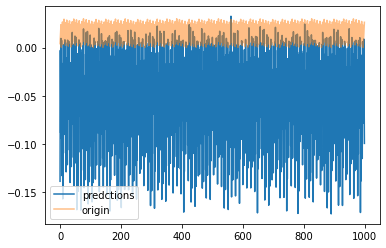

In [43]:
plt.figure()
plt.plot(pre,label='predctions',alpha=1)
plt.plot(Ytest,label='origin',alpha=0.5)
plt.legend(['predctions','origin'])


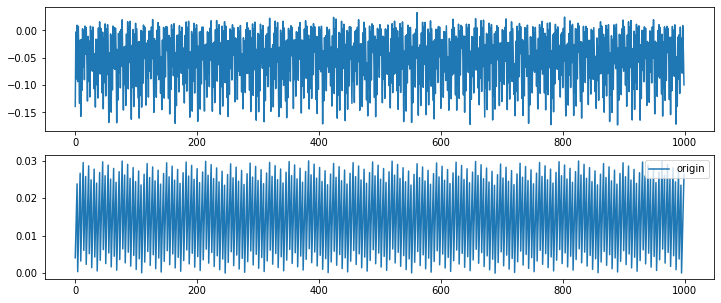

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()

In [45]:
pre.shape

(1000, 1)

In [46]:
np.mean(np.maximum(pre-Ytest,Ytest-pre))

0.07036895004525376